In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
data = pd.read_csv('moments.csv', index_col=None)

X = data.drop('dist', axis=1).copy() # predictors
y = data['dist'].copy() # response variable

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# scaling the data
#X_train_scaled = scale(X_train)
#X_test_scaled = scale(X_test)

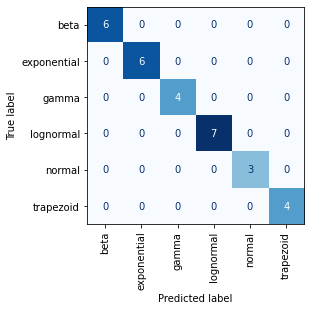

In [29]:
clf_gbm = GradientBoostingClassifier(n_estimators=1000,
                                     learning_rate=0.05,
                                     max_depth=3)
                                     
clf_gbm.fit(X_train, y_train)

y_pred = clf_gbm.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(c_matrix, display_labels=clf_gbm.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False, xticks_rotation='vertical')
plt.show()

In [23]:
param_grid = [
    {'n_estimators':[100, 500, 750, 1000, 1500, 2000],
     'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5], 
     'max_depth':[3, 4, 5, 6, 7, 8]},
]

optimal_params = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10, verbose=0)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 1000}


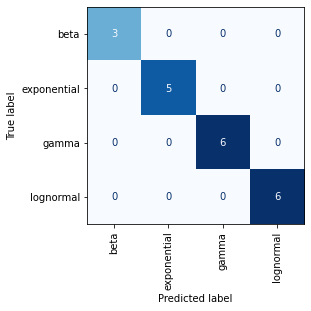

In [25]:
n_estimators = optimal_params.best_params_['n_estimators']
l_rate = optimal_params.best_params_['learning_rate']
m_depth = optimal_params.best_params_['max_depth']

clf_gbm = GradientBoostingClassifier(n_estimators=n_estimators,
                                     learning_rate=l_rate,
                                     max_depth=m_depth)
                                     
clf_gbm.fit(X_train, y_train)

y_pred = clf_gbm.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(c_matrix, display_labels=clf_gbm.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False, xticks_rotation='vertical')
plt.show()